## 0 環境構築

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
np.set_printoptions(precision=8)
np.random.seed(123)

In [2]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import japanize_matplotlib
import matplotlib as mpl
font = mpl.rcParams['font.family']
sns.set(context='notebook', style='whitegrid', font=font)

## 1 国内感染者数の推移

In [4]:
!wget https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv

--2022-05-29 06:32:24--  https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv
Resolving www3.nhk.or.jp (www3.nhk.or.jp)... 23.220.128.155
Connecting to www3.nhk.or.jp (www3.nhk.or.jp)|23.220.128.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26116 (26K) [application/x-excel]
Saving to: ‘nhk_news_covid19_domestic_daily_data.csv.1’

nhk_news_covid19_do 100%[===================>]  25.50K  --.-KB/s    in 0.02s   

2022-05-29 06:32:25 (1.64 MB/s) - ‘nhk_news_covid19_domestic_daily_data.csv.1’ saved [26116/26116]



In [5]:
# df_nhk = pd.read_csv("https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
# df_nhk.head()

In [6]:
df_nhk = pd.read_csv("nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
df_nhk.head()

,国内の感染者数_1日ごとの発表数,国内の感染者数_累計,国内の死者数_1日ごとの発表数,国内の死者数_累計
日付,,,,
2020-01-16,1,1,0,0
2020-01-17,0,1,0,0
2020-01-18,0,1,0,0
2020-01-19,0,1,0,0
2020-01-20,0,1,0,0


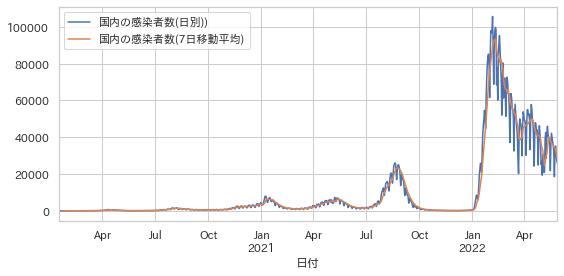

In [7]:
df_nhk['国内の感染者数_1日ごとの発表数'].plot(figsize=(8, 4), grid=True, legend=True, label="国内の感染者数(日別))")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(figsize=(8, 4), grid=True, legend=True, label="国内の感染者数(7日移動平均)")
plt.tight_layout()

## 2 ダウンロード

### (1) rakuten-all-2021_2022

In [8]:
# FILE_ID = "1-8QbsBoYuGT_uY9n3MsRWtLE95eaMLyO"
# FILE_NAME = "rakuten-all-2020-2021.tsv.zip"
# # !curl -sc ./cookie "https://drive.google.com/uc?export=download&id={FILE_ID}"
# # CODE = !awk '/_warning_/ {print $NF}' ./cookie
# # !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={CODE[0]}&id={FILE_ID}" -o {FILE_NAME}

# !curl -L "https://docs.google.com/uc?export=download&id={FILE_ID}" > {FILE_NAME}

In [9]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
FILE_ID = "1_yUCVULShe7YRWFmjh50WuYaMvi522VX"
!gdown --id {FILE_ID}

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_yUCVULShe7YRWFmjh50WuYaMvi522VX
To: /content/rakuten-all-2021-2022.tsv.zip
100% 17.9M/17.9M [00:00<00:00, 187MB/s]


### (2) rakuten-all-2018-2019

In [11]:
# FILE_ID = "1-6dvK09H5rCUdpcH29qn_E4ABRnwEZPu"
# FILE_NAME = "rakuten-all-2018-2019.tsv.zip"
# # !curl -sc ./cookie "https://drive.google.com/uc?export=download&id={FILE_ID}"
# # CODE = !awk '/_warning_/ {print $NF}' ./cookie
# # !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={CODE[0]}&id={FILE_ID}" -o {FILE_NAME}

# !curl -L "https://docs.google.com/uc?export=download&id={FILE_ID}" > {FILE_NAME}

In [12]:
FILE_ID = "1bC-3PwmZXo4-DXNCNAmSYywYMI2JhzlS"
!gdown --id {FILE_ID}

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1bC-3PwmZXo4-DXNCNAmSYywYMI2JhzlS 



In [13]:
!ls

nhk_news_covid19_domestic_daily_data.csv    rakuten-all-2021-2022.tsv
nhk_news_covid19_domestic_daily_data.csv.1  rakuten-all-2021-2022.tsv.zip
rakuten-all-2019-2020.tsv		    sample_data
rakuten-all-2019-2020.tsv.zip


In [14]:
!unzip rakuten-all-2021-2022.tsv.zip
!unzip rakuten-all-2019-2020.tsv.zip
!wc -l *.tsv

Archive:  rakuten-all-2021-2022.tsv.zip
replace rakuten-all-2021-2022.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  rakuten-all-2019-2020.tsv.zip
replace rakuten-all-2019-2020.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
   162433 rakuten-all-2019-2020.tsv
   142457 rakuten-all-2021-2022.tsv
   304890 total


In [15]:
!head -n +4 rakuten-all-2021-2022.tsv

カテゴリー	エリア	施設番号	施設名	コメント	総合	サービス	立地	部屋	設備・アメニティ	風呂	食事	旅行の目的	同伴者	宿泊年月	投稿者	年代	性別	投稿回数
A_レジャー	01_登別	104803	伊達ビジネスホテル　キャッスル	６月１６日に出張で利用しました。値段が安いので決めましたが、ベッドの寝心地、部屋の清潔感、コンビニが目の前にあること、そして何より、受付の女性の方の対応が親切で好印象でした。値段以上のものが得られました。	4	5	5	5	5	5	-	ビジネス	一人	2021-06-01	ブー0605	50代	男性	na
A_レジャー	01_登別	106028	蟠渓温泉　湯人家	家族的な親切な対応をして頂きました。	4	5	4	3	3	4	3	レジャー	一人	2021-07-01	旅好き1720	70代	男性	na
A_レジャー	01_登別	106028	蟠渓温泉　湯人家	静かな立地と温泉でリフレッシュできました。他、天婦羅等美味しく頂きました。	4	3	4	4	2	5	4	レジャー	一人	2021-03-01	投稿者	na	na	na


In [16]:
df_all = pd.read_csv("rakuten-all-2021-2022.tsv", sep='\t', quoting=3, escapechar='\\')
df_all['宿泊年月'] = pd.to_datetime(df_all['宿泊年月'], format='%Y-%m-%d')
df_all['index'] = df_all.index
df_all.set_index('宿泊年月', inplace=True)
df_all = df_all.tz_localize('Asia/Tokyo')
print(df_all.shape)
df_all.head()

(142456, 19)


,カテゴリー,エリア,施設番号,施設名,コメント,総合,サービス,立地,部屋,設備・アメニティ,風呂,食事,旅行の目的,同伴者,投稿者,年代,性別,投稿回数,index
宿泊年月,,,,,,,,,,,,,,,,,,,
2021-06-01 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,６月１６日に出張で利用しました。値段が安いので決めましたが、ベッドの寝心地、部屋の清潔感、コ...,4,5,5,5,5,5,-,ビジネス,一人,ブー0605,50代,男性,na,0
2021-07-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,家族的な親切な対応をして頂きました。,4,5,4,3,3,4,3,レジャー,一人,旅好き1720,70代,男性,na,1
2021-03-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,静かな立地と温泉でリフレッシュできました。他、天婦羅等美味しく頂きました。,4,3,4,4,2,5,4,レジャー,一人,投稿者,na,na,na,2
2021-04-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,朝早めの御飯ありがとうございました。ひと言、若いほうのおばあちゃんもっと接客改めた方がいいよ...,3,2,4,3,3,3,2,レジャー,一人,トッチ8199,60代,男性,na,3
2022-04-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,静かな環境で精神的癒しを乞いたい方にピッタリな宿です。源泉の風呂は気持ちいいし、宿内も静かで...,4,4,5,4,4,4,-,レジャー,友達,投稿者,na,na,na,4


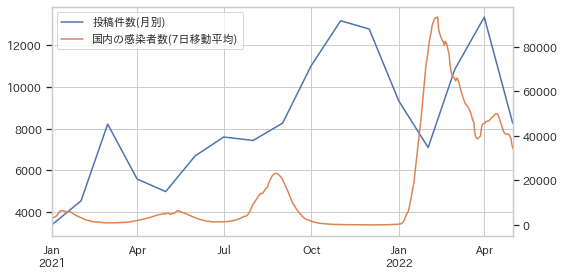

In [17]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# df_all['index'].resample('D').count().rolling(7).mean().plot(ax=ax1, grid=True, c='C0', legend=True, label="投稿件数(7日移動平均)")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(ax=ax2, grid=False, c='C1', legend=False, label="国内の感染者数(7日移動平均)")
df_all['index'].resample('M').count().plot(ax=ax1, grid=True, c='C0', legend=True, label="投稿件数(月別)")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, facecolor='white', loc='upper left')
ax1.set_xlabel("")

plt.tight_layout()

## 3 クチコミ "rakuten-all-2021-2022" のテキスト分析

In [18]:
!pip uninstall -y ginza

Found existing installation: ginza 5.1.1
Uninstalling ginza-5.1.1:
  Successfully uninstalled ginza-5.1.1


In [19]:
!pip install -U ginza ja_ginza ja_ginza_electra spacy-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ginza-5.1.1-py3-none-any.whl (20 kB)


In [20]:
import spacy, ginza
nlp = spacy.load('ja_ginza')
# nlp = spacy.load('ja_ginza_electra')
ginza.set_split_mode(nlp, "C")
for p in nlp.pipeline:
    print(p)

nlp = spacy.load('ja_ginza')
doc = nlp('望遠鏡で泳いでいる女の子を見た。')
for sent in doc.sents:
    for token in sent:
        print(
            token.i,
            token.orth_,
            token.lemma_,
            token.norm_,
            token.morph.get("Reading"),
            token.pos_,
            token.morph.get("Inflection"),
            token.tag_,
            token.dep_,
            token.head.i,
        )
    print('EOS')
  
from spacy import displacy
displacy.render(doc, style="dep", options={"compact":True}, jupyter=True)
displacy.render(doc, style="ent")

('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7fdb4dfd7280>)
('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7fdb4df871d0>)
('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7fdb4df873d0>)
('morphologizer', <spacy.pipeline.morphologizer.Morphologizer object at 0x7fdb4dfd70c0>)
('compound_splitter', <ginza.compound_splitter.CompoundSplitter object at 0x7fdb4df5f110>)
('bunsetu_recognizer', <ginza.bunsetu_recognizer.BunsetuRecognizer object at 0x7fdb4df5f0d0>)
0 望遠鏡 望遠鏡 望遠鏡 ['ボウエンキョウ'] NOUN [] 名詞-普通名詞-一般 obl 2
1 で で で ['デ'] ADP [] 助詞-格助詞 case 0
2 泳い 泳ぐ 泳ぐ ['オヨイ'] VERB ['五段-ガ行;連用形-イ音便'] 動詞-一般 acl 5
3 で で で ['デ'] SCONJ [] 助詞-接続助詞 mark 2
4 いる いる 居る ['イル'] VERB ['上一段-ア行;連体形-一般'] 動詞-非自立可能 fixed 3
5 女の子 女の子 女の子 ['オンナノコ'] NOUN [] 名詞-普通名詞-一般 obj 7
6 を を を ['ヲ'] ADP [] 助詞-格助詞 case 5
7 見 見る 見る ['ミ'] VERB ['上一段-マ行;連用形-一般'] 動詞-非自立可能 ROOT 7
8 た た た ['タ'] AUX ['助動詞-タ;終止形-一般'] 助動詞 aux 7
9 。 。 。 ['。'] PUNCT [] 補助記号-句点 punct 7
EOS


/usr/local/lib/python3.7/dist-packages/spacy/displacy/__init__.py:200: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


'<div class="entities" style="line-height: 2.5; direction: ltr">望遠鏡で泳いでいる女の子を見た。</div>'

In [21]:
import spacy, ginza
# nlp = spacy.load('ja_ginza_electra')
nlp = spacy.load('ja_ginza')
ginza.set_split_mode(nlp, "C")
for p in nlp.pipeline:
    print(p)

def ginza_tokenizer(text):
    with nlp.disable_pipes(["ner", "parser"]):
        doc = nlp(text)
        ret = []
        for token in doc:
            tags = token.tag_.split('-')
            # 品詞を選択する
            if tags[0] not in ['名詞','動詞','形容詞','副詞','形容動詞','未知語']:
                continue
            # 不要語を除去する
            if tags[0] == '名詞' and tags[1] == '非自立可能':  # 'よう'
                continue
            if tags[0] == '動詞' and tags[1] == '非自立可能':  # 'いる'
                continue
            ret.append(token.lemma_)
        return ' '.join(ret)

('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7fdb4e021c90>)
('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7fdb3872e150>)
('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7fdb3872e250>)
('morphologizer', <spacy.pipeline.morphologizer.Morphologizer object at 0x7fdb4bb3d2f0>)
('compound_splitter', <ginza.compound_splitter.CompoundSplitter object at 0x7fdb39513c90>)
('bunsetu_recognizer', <ginza.bunsetu_recognizer.BunsetuRecognizer object at 0x7fdb394fc650>)


In [22]:
" ".join(df_all['コメント'][0:100].map(ginza_tokenizer))

'6 月 16 出張 利用 値段 安い 決める ベッド 寝心地 部屋 清潔 感 コンビニ 目 前 こと 受付 女性 方 対応 親切 印象 値段 以上 もの 家族 親切 対応 立地 温泉 リフレッシュ 他 天婦羅 美味しい 朝 御飯 ひと言 若い ほう ばあ もっと 接客 改める 方 いい 環境 精神的 癒し 乞う 方 宿 源泉 風呂 気持ち いい 宿内 最高 利用 思う 素泊まり 予約 20 時 到着 主人 天 ざる 作る 翌日 日曜日 朝 バス 乗る ため 6 時 チェックアウト ところ 奥様 わざわざ 宿 前 バス停 休日 運休 こと 確認 次 バス 待つ あいだ コーヒー 淹れる 豪華 設備 求める 方 以外 自信 もつ 推薦 宿 数々 難病 魔法 温泉 体感 ほんと すごい ポカポカ 凄い 温泉 食事 豪華 素晴らしい コスパ すごい オーナー 夫妻 素晴らしい サービス 極上 ほんと ススメる 民宿 蕎麦屋 居酒屋 食事 特に 期待 低価格 宿泊料金 おいしい 料理 満足 山 中 お宿 刺身 出る そば屋 出汁 使い方 思う ホッケ フライ ホッケ 下 処理 しっかり 骨 1 たまたま しれる ビックリ 中身 ふわふわ 衣 サクサク 素晴らしい 天ぷら おいしい 温泉 湯 窓 開ける クールダウン シャワー 男女 それぞれ 3 シャワー 出 良い 場所 試す 使う 良い こと 後 気づく 野 観光 ホテル 中 民宿 存在 マスター 奥様 方 白 ワン ちょっと 寒い 朝晩 外 がんばる 出迎える 今回 特に コロナ 避ける ため 宿泊 民宿 選ぶ 大正解 利用 思う 大変 よい 伊達 宿泊 一 客室 とても 広い ツイン 部屋 窓 隣部屋 窓 向かい合わせ 外 景色 見える 部屋 とても 広い バスルーム 昔 老舗 ホテル 雰囲気 空調 設備 老朽化 風量 さげる 音 うるさい 安眠 妨げ 料金 仕方 部屋 雰囲気 良い とても 惜しい 喫煙室 選ぶ せい 部屋 ひどい 古い ホテル 利用 こと 多い 清潔 感 ない 幻滅 壁紙 古い シミ セロテープ 止める 箇所 はがれる まま 外す 後 まま 穴 開く まま カーペット がた b やけ こげ まま ローヤル ホテル 名 泣く 古い 努力 風 見える カウンター 女性 こち 話しかける 前 あいさつ な

In [23]:
df_all['ginza'] = df_all['コメント'].map(ginza_tokenizer)
df_all['length'] = df_all['ginza'].map(lambda x: x.split()).map(len)
print(df_all.shape)
df_all.head()

(142456, 21)


,カテゴリー,エリア,施設番号,施設名,コメント,総合,サービス,立地,部屋,設備・アメニティ,...,食事,旅行の目的,同伴者,投稿者,年代,性別,投稿回数,index,ginza,length
宿泊年月,,,,,,,,,,,,,,,,,,,,,
2021-06-01 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,６月１６日に出張で利用しました。値段が安いので決めましたが、ベッドの寝心地、部屋の清潔感、コ...,4,5,5,5,5,...,-,ビジネス,一人,ブー0605,50代,男性,na,0,6 月 16 出張 利用 値段 安い 決める ベッド 寝心地 部屋 清潔 感 コンビニ 目 ...,26
2021-07-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,家族的な親切な対応をして頂きました。,4,5,4,3,3,...,3,レジャー,一人,旅好き1720,70代,男性,na,1,家族 親切 対応,3
2021-03-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,静かな立地と温泉でリフレッシュできました。他、天婦羅等美味しく頂きました。,4,3,4,4,2,...,4,レジャー,一人,投稿者,na,na,na,2,立地 温泉 リフレッシュ 他 天婦羅 美味しい,6
2021-04-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,朝早めの御飯ありがとうございました。ひと言、若いほうのおばあちゃんもっと接客改めた方がいいよ...,3,2,4,3,3,...,2,レジャー,一人,トッチ8199,60代,男性,na,3,朝 御飯 ひと言 若い ほう ばあ もっと 接客 改める 方 いい,11
2022-04-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,静かな環境で精神的癒しを乞いたい方にピッタリな宿です。源泉の風呂は気持ちいいし、宿内も静かで...,4,4,5,4,4,...,-,レジャー,友達,投稿者,na,na,na,4,環境 精神的 癒し 乞う 方 宿 源泉 風呂 気持ち いい 宿内 最高 利用 思う,14


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(max_df=0.5, min_df=1, max_features=500)
bag = count.fit_transform(df_all['ginza'].values)
feature_names = count.get_feature_names()
feature_names[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10', '11', '12', '15', '1人', '20', '24', '2人', '30', 'fi']

In [29]:
tf = bag.toarray().sum(axis=0)
for i in tf.argsort()[:-10:-1]:
    print(tf[i], "\t", count.get_feature_names()[i])

67709 	 部屋
65924 	 良い
55455 	 利用
52442 	 思う
48599 	 とても
46388 	 ホテル
39350 	 ない
32937 	 こと
32089 	 宿泊


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
df_count = pd.DataFrame(bag.toarray())
df_count.columns = feature_names
print(df_count.shape)
df_count.head()

(142456, 500)


,10,11,12,15,1人,20,24,2人,30,fi,...,飲む,飲食店,館内,香り,駅近,駐車場,驚く,高い,高級,髪の毛
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


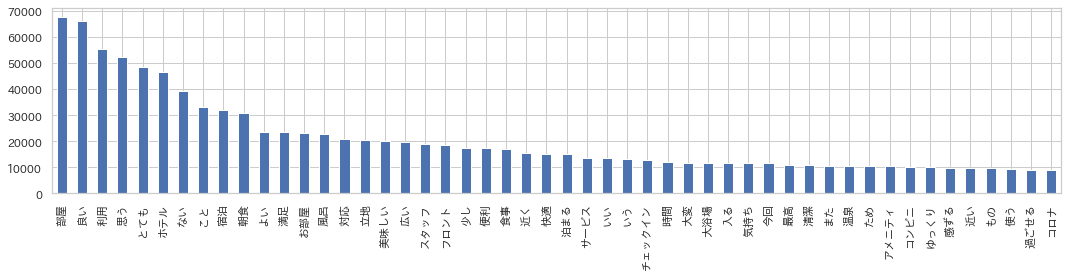

In [31]:
df_count.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(figsize=(15, 4), grid=True)
plt.tight_layout()

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf = tfidf_vectorizer.fit_transform(bag)

In [33]:
df_tfidf = pd.DataFrame(tfidf.toarray())
df_tfidf.columns = feature_names
print(df_tfidf.shape)
df_tfidf.head()

(142456, 500)


,10,11,12,15,1人,20,24,2人,30,fi,...,飲む,飲食店,館内,香り,駅近,駐車場,驚く,高い,高級,髪の毛
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2 可視化

#### Word Cloud

In [34]:
topic = bag.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

67709 	 部屋
65924 	 良い
55455 	 利用
52442 	 思う
48599 	 とても
46388 	 ホテル
39350 	 ない
32937 	 こと
32089 	 宿泊


In [35]:
topic = tfidf.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

9355.77892986949 	 良い
8420.880074885757 	 部屋
8065.453052254905 	 利用
7368.358108334298 	 とても
6400.235470031798 	 ホテル
6356.461164185891 	 思う
5136.234463969584 	 朝食
5043.052306577513 	 宿泊
5007.581399271652 	 ない


In [36]:
font_path = !find / -name "*.ttf" 2> /dev/null | grep -s "ipaexg.ttf" | head -n 1
font_path

['/usr/local/lib/python3.7/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf']

良い,部屋,利用,とても,ホテル,思う,朝食,宿泊,ない,よい,満足,こと,立地,便利,風呂,対応,お部屋,広い,美味しい,快適


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


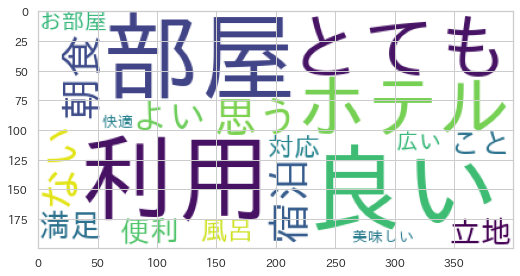

In [37]:
from wordcloud import WordCloud

fig = plt.figure(figsize=(8,4))
words = count.get_feature_names()
n_top_words = 20

long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
print(long_string)

wordcloud = WordCloud(font_path=font_path[0], background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
plt.imshow(wordcloud)

plt.tight_layout()

#### 対応分析

In [38]:
df_all[['index', 'カテゴリー', 'エリア']].head()

,index,カテゴリー,エリア
宿泊年月,,,
2021-06-01 00:00:00+09:00,0,A_レジャー,01_登別
2021-07-01 00:00:00+09:00,1,A_レジャー,01_登別
2021-03-01 00:00:00+09:00,2,A_レジャー,01_登別
2021-04-01 00:00:00+09:00,3,A_レジャー,01_登別
2022-04-01 00:00:00+09:00,4,A_レジャー,01_登別


In [39]:
df_merge = pd.merge(df_all[['index', 'カテゴリー', 'エリア']], df_count, left_on='index', how='inner', right_index=True)
print(df_merge.shape)
df_merge.head()

(142456, 503)


,index,カテゴリー,エリア,10,11,12,15,1人,20,24,...,飲む,飲食店,館内,香り,駅近,駐車場,驚く,高い,高級,髪の毛
宿泊年月,,,,,,,,,,,,,,,,,,,,,
2021-06-01 00:00:00+09:00,0,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-07-01 00:00:00+09:00,1,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-01 00:00:00+09:00,2,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-04-01 00:00:00+09:00,3,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-04-01 00:00:00+09:00,4,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_period2 = df_merge.groupby(["エリア"]).sum()
df_period2.drop('index', axis=1, inplace=True)
df_period2.head()

,10,11,12,15,1人,20,24,2人,30,fi,...,飲む,飲食店,館内,香り,駅近,駐車場,驚く,高い,高級,髪の毛
エリア,,,,,,,,,,,,,,,,,,,,,
01_登別,79,46,21,32,31,39,16,45,44,13,...,47,8,83,18,3,93,40,91,16,24
02_草津,200,98,89,72,44,67,75,88,73,17,...,137,20,200,25,0,208,58,153,47,23
03_箱根,322,201,158,152,194,137,113,291,163,92,...,434,31,466,135,23,358,183,481,105,59
04_道後,113,90,82,43,56,42,33,79,74,40,...,104,67,133,31,20,488,53,198,51,20
05_湯布院,75,51,39,23,44,29,33,70,29,20,...,73,7,46,22,1,72,33,97,24,7


In [41]:
!pip install mca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6025 sha256=2129190980dd48e3125c6b44b6bbfe20c7c005383fb8eb469fd716450843fca7
  Stored in directory: /root/.cache/pip/wheels/00/46/2a/acfca530ddd1e1d72271e07cb7517611d10cd6bcd05cd0cf34
Successfully built mca


In [42]:
import mca
ncols = df_period2.shape[1]
mca_ben = mca.MCA(df_period2, ncols=ncols, benzecri=False)
mca_ben.fs_r(N=2)

array([[-0.429802  ,  0.13698302],
       [-0.76935888, -0.70492265],
       [-0.55583824,  0.24923716],
       [-0.24996804,  0.08478658],
       [-0.6468138 ,  0.23882249],
       [ 0.10864345, -0.00647217],
       [ 0.14612402, -0.01664484],
       [ 0.15488551, -0.00809812],
       [ 0.13534809, -0.01599033],
       [ 0.13073787, -0.01392652]])

In [43]:
result_row = pd.DataFrame(mca_ben.fs_r(N=2))
result_row.index = list(df_period2.index)
result_row

,0,1
01_登別,-0.429802,0.136983
02_草津,-0.769359,-0.704923
03_箱根,-0.555838,0.249237
04_道後,-0.249968,0.084787
05_湯布院,-0.646814,0.238822
06_札幌,0.108643,-0.006472
07_名古屋,0.146124,-0.016645
08_東京,0.154886,-0.008098
09_大阪,0.135348,-0.015990
10_福岡,0.130738,-0.013927


In [44]:
result_col = pd.DataFrame(mca_ben.fs_c(N=2))
result_col.index = list(df_period2.columns)
result_col

,0,1
10,-0.026574,-0.094773
11,-0.029021,-0.035624
12,0.120146,-0.071289
15,-0.008129,-0.054731
1人,-0.007116,0.075694
...,...,...
駐車場,0.007581,-0.043747
驚く,-0.061364,0.036246
高い,0.042727,0.019010
高級,-0.002403,-0.026643


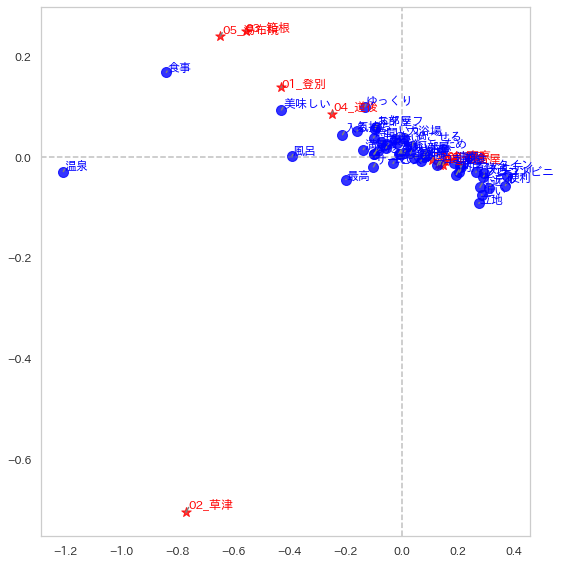

In [45]:
import random

plt.figure(figsize=(8,8))

tf = bag.toarray().sum(axis=0)
top_tf = tf.argsort()[:-50:-1]

# 行方向のプロット (外部変数)
plt.scatter(result_row[0], result_row[1], s=100, marker="*", c="red", alpha=0.8)
for i in range(result_row.shape[0]):
    r = random.random() * 0.01
    plt.text(result_row.iloc[i, 0]+r, result_row.iloc[i, 1]+r, result_row.index[i], c="red")
    plt.plot([result_row.iloc[i, 0]+r, result_row.iloc[i, 0]], [result_row.iloc[i, 1]+r, result_row.iloc[i, 1]], c="gray")

# 列方向のプロット (単語)
plt.scatter(result_col.iloc[top_tf, 0], result_col.iloc[top_tf, 1], s=100, marker="o", c="blue", alpha=0.8)
for i in top_tf:
    r = random.random() * 0.01
    plt.text(result_col.iloc[i, 0]+r, result_col.iloc[i, 1]+r, result_col.index[i], c="blue")
    plt.plot([result_col.iloc[i, 0]+r, result_col.iloc[i, 0]], [result_col.iloc[i, 1]+r, result_col.iloc[i, 1]], c="gray")

plt.axhline(0, c="gray", ls='--', alpha=0.5)
plt.axvline(0, c="gray", ls='--', alpha=0.5)
plt.grid(False)
plt.tight_layout()

#### 共起ネットワーク

In [46]:
n_top_words = 50
top_tf = tf.argsort()[:-n_top_words:-1]
top_tf

array([471, 430, 210, 291,  55, 142,  60,  34, 261, 336,  82, 381,  30,
       486, 265, 414, 422, 276, 112, 138, 269, 188, 488, 456, 289, 362,
       107,  17,  18, 120, 323, 248, 249, 193, 358, 171, 333, 375,  71,
       377,  48,  90, 104,  80, 296, 455,  77, 184, 464])

In [47]:
df_nodes = pd.DataFrame({'label': [feature_names[i] for i in top_tf], 'freq': tf[top_tf]})
df_nodes.head()

,label,freq
0,部屋,67709
1,良い,65924
2,利用,55455
3,思う,52442
4,とても,48599


In [48]:
from itertools import combinations
pairs = list(combinations(top_tf, 2))

min_col = 1000
left, right, freq = [], [], []
for p in pairs:
    df = df_count[(df_count.iloc[:, list(p)] > 0).all(axis=1)].shape[0]
    if df > min_col:
        left.append(feature_names[p[0]])    
        right.append(feature_names[p[1]])
        freq.append(df)

df_edges = pd.DataFrame({'left': left, 'right': right, 'freq': freq})
df_edges.head()

,left,right,freq
0,部屋,良い,19746
1,部屋,利用,15459
2,部屋,思う,17288
3,部屋,とても,13795
4,部屋,ホテル,13371


Louvain Modularity:  0.02229656709026354


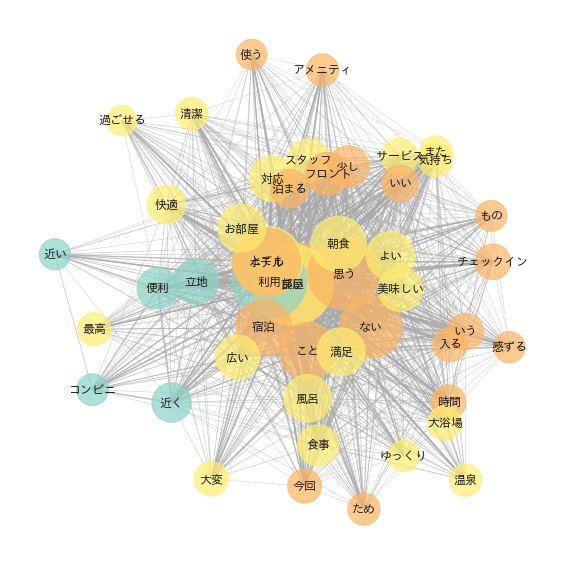

In [54]:
import networkx as nx
import community.community_louvain

G = nx.Graph()
G.add_nodes_from(df_nodes['label'])
G.add_weighted_edges_from(df_edges.values)

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.5)
part = community.community_louvain.best_partition(G)
print("Louvain Modularity: ", community.community_louvain.modularity(part, G))
size = float(len(set(part.values())))

# 孤立した node を削除
isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
for n in isolated:
    G.remove_node(n)

node_size = df_nodes['freq'] / 10
node_class = [part.get(node) for node in G.nodes()]
edge_width = [d["weight"] / 3000 for (u, v, d) in G.edges(data=True)]

nx.draw_networkx_nodes(G, pos, alpha=0.7, cmap=plt.get_cmap("Set3_r"), node_size=node_size, node_color=node_class)
nx.draw_networkx_edges(G, pos, alpha=0.7, edge_color="darkgrey", width=edge_width)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_weight="bold")

plt.axis('off')
plt.tight_layout()

In [55]:
(node_size.shape)

(49,)

### 3.3 カテゴリーごとの分析

#### 頻出語リスト

In [56]:
df_count_1 = df_count.iloc[df_all[df_all['カテゴリー'] == "A_レジャー"]['index']]
df_count_2 = df_count.iloc[df_all[df_all['カテゴリー'] == "B_ビジネス"]['index']]

dc_list = [df_count_1, df_count_2]

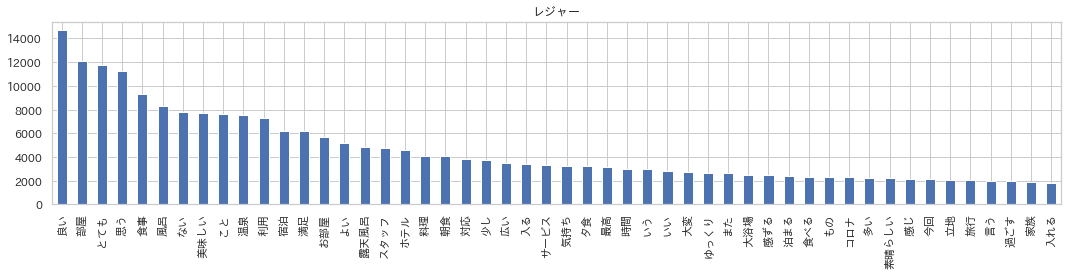

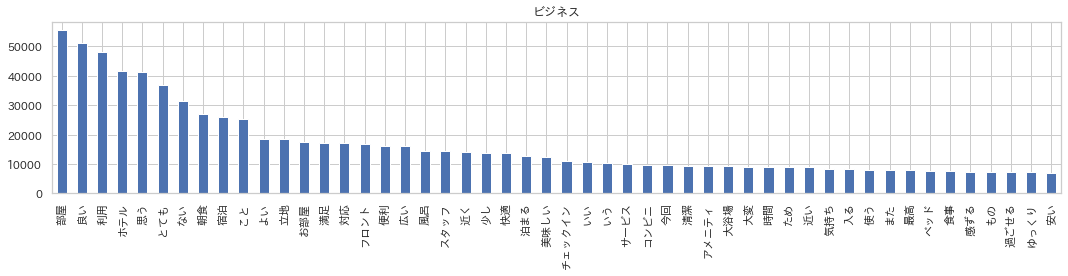

In [57]:
n_top_words = 50

for i, dc in enumerate(dc_list):
    dc.sum(axis=0).sort_values(ascending=False)[0:n_top_words].plot.bar(figsize=(15, 4), grid=True)
    plt.title(["レジャー", "ビジネス"][i])
    plt.tight_layout()
    plt.show()

#### トピックモデル

In [58]:
df_tfidf_1 = df_tfidf.iloc[df_all[df_all['カテゴリー'] == "A_レジャー"]['index']]
df_tfidf_2 = df_tfidf.iloc[df_all[df_all['カテゴリー'] == "B_ビジネス"]['index']]

dt_list = [df_tfidf_1, df_tfidf_2]

In [63]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

font_path = !find / -name "*.ttf" 2> /dev/null | grep -s "ipaexg.ttf" | head -n 1
font_path

['/usr/local/lib/python3.7/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf']

In [64]:
def plot_lda(tfidf, n_top_words):

    lda = LDA(max_iter=25, learning_method='batch', random_state=0, n_jobs=-1, n_components=4)
    lda.fit(tfidf)

    words = count.get_feature_names()

    fig = plt.figure(figsize=(15,8))

    for topic_idx, topic in enumerate(lda.components_):
        print("\nTopic #", topic_idx, ":")
        long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(long_string)

        ax = fig.add_subplot(2, 2, topic_idx + 1)
        wordcloud = WordCloud(font_path=font_path[0], background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
        wordcloud.generate(long_string)
        ax.imshow(wordcloud)
        ax.set_title('Topic '+str(topic_idx))

    plt.tight_layout()
    plt.show()

レジャー


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic # 0 :
ない,部屋,思う,良い,食事,風呂,こと,少し,温泉,いう,入る,夕食,感ずる,もの,言う,宿泊,ホテル,古い,露天風呂,感じ,とても,いい,悪い,時間,無い,ところ,利用,料理,満足,朝食,スタッフ,ため,出る,よい,予約,チェックイン,大浴場,対応,もう,フロント,多い,食べる,駐車場,美味しい,お部屋,入れる,コロナ,少ない,期待,広い,トイレ,狭い,ちょっと,サービス,欲しい,寒い,しれる,使う,泊まる,普通,かなり,案内,問題,布団,説明,値段,必要,建物,高い,プラン,旅館,子供,わかる,バイキング,掃除,今回,全体的,設備,特に,あまり,気持ち,持つ,考える,あと,安い,分かる,全く,場所,タオル,なし,改善,立地,使用,まま,ベッド,印象,以外,不便,一人,内容,女性,すぐ,施設,小さい,ほしい,用意,自分,評価,料金,アメニティ,つく,仕方ない,聞く,書く,電話,チェックアウト,確認,清掃,不満,見える,違う,テーブル,シャワー,歩く,待つ,温度,箱根,せい,早い,接客,初めて,状態,10,空く,聞こえる,どう,到着,事前,男性,ほう,従業員,エレベーター,そう,行き届く,匂い,遅い,もっと,ゆっくり,以上,貸切,口コミ,清潔,何度,荷物,価格,館内,廊下,すごい,開ける,大変,ご飯,よる,寝る,レストラン,エアコン,会場,入浴,時期,とき,注意,嬉しい,新しい,落ちる,移動,家族,無し,ビジネスホテル,1人,感じる,助かる,楽しみ,提供,雰囲気,レベル,ありがたい,メニュー,臭い,ほぼ,以前,なかなか,使える,うるさい,客室,選ぶ,連絡,薄い,対策,取る,通り,やや,混む,よく,最初,洗面所,また,テレビ,写真,足りる,ロビー,本当,30,近く,大きい,驚く,旅行,自体,長い,金額,種類,夜中,冷蔵庫,部分,最後,高級,変わる,洗面台,程度,快適,気分,関する,伝える,受付,2人,暗い,素晴らしい,バス,離れる,スリッパ,帰る,近い,比べる,全体,一度,泊まれる,入口,困る,20,着く,椅子,設定,不快,大人,無料,若干,きちんと,洗い場,少々,15,素泊まり,一番,ドア,場合,とる,おいしい,ほとんど,品数,ドライヤー,しっかり,まず,状況,遠い,戻る,連泊,室内,コンセント,当日,ひと,混雑,楽しむ,結構,残る,不安

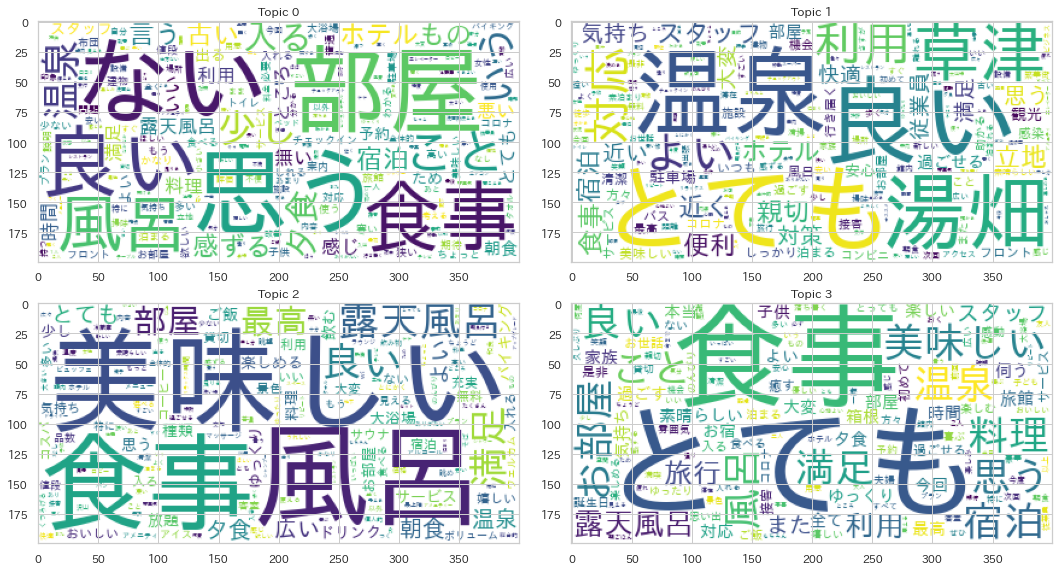

ビジネス


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic # 0 :
部屋,ない,思う,ホテル,良い,こと,少し,フロント,風呂,チェックイン,シャワー,ベッド,いう,狭い,トイレ,無い,利用,問題,宿泊,感ずる,広い,使う,言う,もの,悪い,入る,清掃,いい,ため,なし,ところ,アメニティ,対応,寝る,とても,掃除,感じ,テレビ,もう,泊まる,古い,以外,エレベーター,時間,予約,必要,わかる,お部屋,よい,ちょっと,タオル,立地,出る,スタッフ,設備,チェックアウト,大きい,特に,分かる,使用,満足,かなり,不満,しれる,今回,あと,快適,欲しい,新しい,冷蔵庫,ビジネスホテル,ルーム,自分,説明,不便,安い,場所,全く,値段,エアコン,全体的,ほしい,使える,案内,聞こえる,すぐ,浴槽,荷物,臭い,高い,入れる,持つ,連泊,ユニットバス,確認,タイプ,普通,浴室,清潔,まま,あまり,コンセント,文句,プラン,女性,改善,小さい,電話,多い,うるさい,バスタブ,テーブル,印象,大浴場,行き届く,初めて,助かる,椅子,寒い,建物,ベット,考える,仕方ない,スペース,廊下,評価,仕事,喫煙,空気清浄機,サービス,匂い,カプセル,デスク,髪の毛,開ける,無し,どう,気持ち,ドア,バスルーム,つく,室内,落ちる,書く,洗面台,眠れる,待つ,嬉しい,聞く,空調,ドライヤー,やや,よく,深夜,よる,自体,スリッパ,困る,温度,設置,照明,受付,連絡,とき,夜中,男性,用意,金額,場合,カーテン,少ない,禁煙,そう,以上,歯ブラシ,洗面所,薄い,長い,10,取る,見える,バス,シングル,滞在,暗い,コロナ,ツイン,ありがたい,なかなか,フロア,価格,シャンプー,交換,ロビー,不安,遅い,料金,駐車場,何度,違う,変える,部分,明るい,すごい,感じる,位置,個人的,暑い,歩く,1人,しっかり,入口,設定,事前,湯船,本当,電子レンジ,少々,驚く,最初,若干,不快,レベル,客室,まだ,早い,期待,選ぶ,せい,申し分,状態,伝える,ほう,残る,結構,注意,施設,洗い場,ゆっくり,到着,空く,もっと,変更,びっくり,2人,知る,食事,一人,ほぼ,揃う,コンパクト,程度,きちんと,接客,希望,関する,15,ほとんど,探す,一番,ずっと,勝手,戻る,ひと,今後,遠い,また,一度,比べる,気分,とにかく,あり,通り,ゆったり,以前,

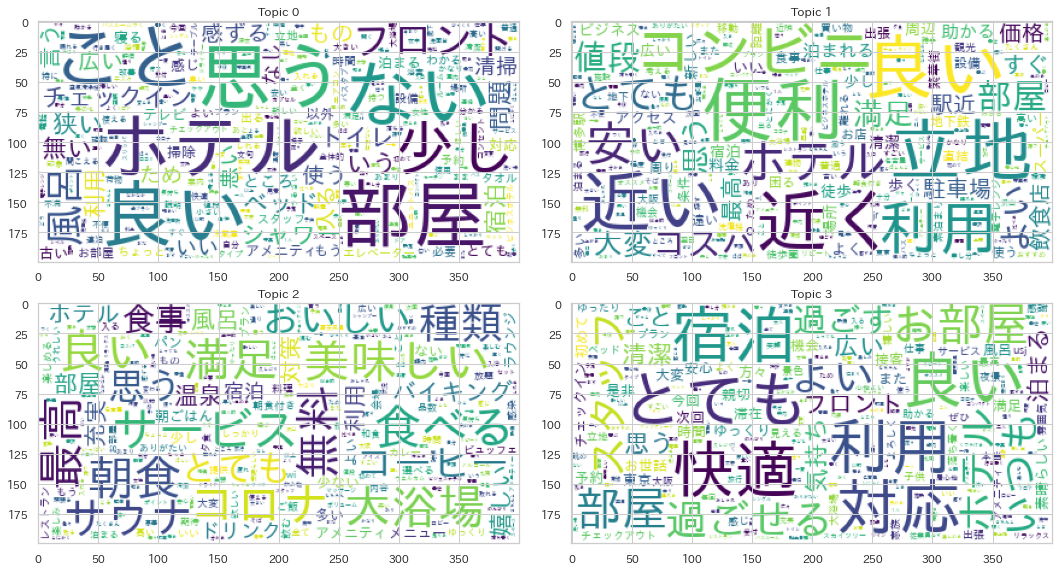

In [65]:
n_top_words = 500

for i, dt in enumerate(dt_list):
    print(["レジャー", "ビジネス"][i])
    plot_lda(dt, n_top_words)